In [1]:
import codigo
from codigo import utils
from codigo import model_utils
import time

In [2]:
import requests
from multiprocessing.pool import ThreadPool as Pool

sites = [
    'https://github.com/veit/jupyter-tutorial/',
    'https://jupyter-tutorial.readthedocs.io/en/latest/',
    'https://github.com/veit/pyviz-tutorial/',
    'https://pyviz-tutorial.readthedocs.io/de/latest/',
    'https://cusy.io/en',
]

def sitesize(url):
    with requests.get(url) as u:
        return url, len(u.content)

pool = Pool(10)
for result in pool.imap_unordered(sitesize, sites):
    print(result)

('https://pyviz-tutorial.readthedocs.io/de/latest/', 32709)
('https://jupyter-tutorial.readthedocs.io/en/latest/', 78705)
('https://cusy.io/en', 30232)
('https://github.com/veit/pyviz-tutorial/', 193582)
('https://github.com/veit/jupyter-tutorial/', 223374)


In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
X=np.array([1,2,3,4,5,6,7,8,9,10])
Y=np.array([1.1,2.2,3.3,4.4,5.5,6.6,7.7,8.8,9.9,10.1])
Y_label=np.array(['A','C','A','A','B','A','B','A','C','A'])
start_time = time.perf_counter()
utils.downsamplingByLabel(X,Y,Y_label,0.8,'A',True)
finish_time = time.perf_counter()
print("Program finished in {} seconds - using serial".format(finish_time-start_time))

DEBUGING
lenFilter 6
r_times 4
irandom  2
index  2
SI
irandom  3
index  5
NO, segundo intento
index  5
SI
irandom  0
index  6
NO, segundo intento
index  6
SI
irandom  0
index  7
Program finished in 0.0015305000001717417 seconds - using serial


In [5]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

In [6]:
with open('dataset/generado/dataset15min/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [7]:
len(array_Xtrain)

3464679

In [8]:
with open('dataset/generado/dataset15min/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [9]:
len(array_Ytrain)

3464679

In [10]:
array_Ytrain

array([[0.35434783],
       [0.34130435],
       [0.35869565],
       ...,
       [0.7       ],
       [0.69565217],
       [0.69130435]])

In [11]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

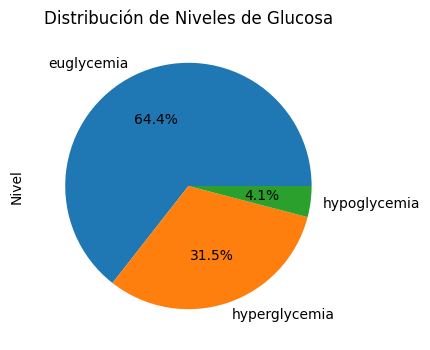

In [12]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [13]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232255
hyperglycemia    1091540
hypoglycemia      140884
Name: Nivel, dtype: int64

In [14]:
df_Y_scaled

,Glucose level,Nivel
0,203.0,hyperglycemia
1,197.0,hyperglycemia
2,205.0,hyperglycemia
3,209.0,hyperglycemia
4,204.0,hyperglycemia
...,...,...
3464674,361.0,hyperglycemia
3464675,364.0,hyperglycemia
3464676,362.0,hyperglycemia
3464677,360.0,hyperglycemia


In [15]:
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)

In [16]:
print(len(XP[2]))

34647


In [17]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

In [18]:
from multiprocessing.pool import ThreadPool as Pool
import time

In [19]:

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 33392
Program finished in 1.9171755000002122 seconds - using multiprocessing
1 67069
Program finished in 1.6403747999997904 seconds - using multiprocessing
2 100986
Program finished in 1.8912233000000924 seconds - using multiprocessing
3 133888
Program finished in 4.2477631000001566 seconds - using multiprocessing
4 167892
Program finished in 1.6393122999998013 seconds - using multiprocessing
5 201992
Program finished in 1.7462065000004259 seconds - using multiprocessing
6 233438
Program finished in 4.592795000000024 seconds - using multiprocessing
7 264362
Program finished in 5.9669199999998455 seconds - using multiprocessing
8 294535
Program finished in 6.8064407000001665 seconds - using multiprocessing
9 323959
Program finished in 7.382853999999497 seconds - using multiprocessing
10 353465
Program finished in 7.776942200000121 seconds - using multiprocessing
11 384076
Program finished in 5.753372999999556 seconds - using multiprocessing
12 414384
Program finished in 7.724883700000

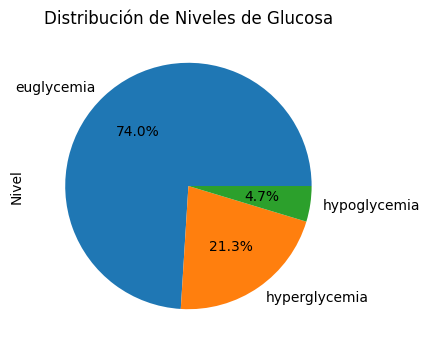

In [20]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [21]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       2232255
hyperglycemia     642978
hypoglycemia      140884
Name: Nivel, dtype: int64

<AxesSubplot: >

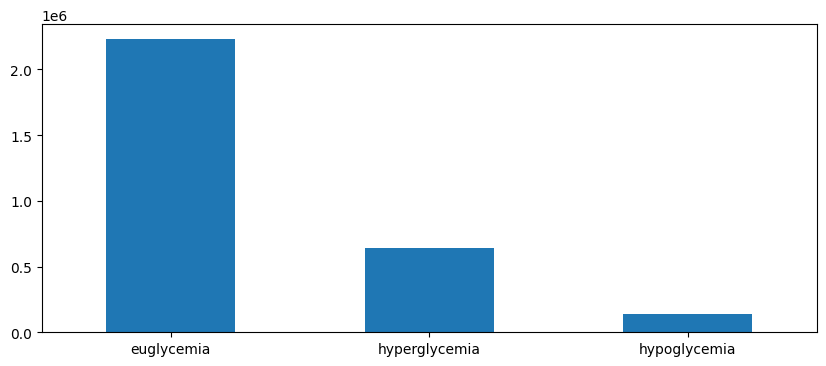

In [22]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [23]:
with open('dataset/generado/dataset15min/array_Xtrain_down.npy', 'wb') as f:
    np.save(f, XNew)

In [24]:
len(XNew)

3016117

In [25]:
with open('dataset/generado/dataset15min/array_Ytrain_down.npy', 'wb') as f:
    np.save(f, YNew)

In [26]:
len(YNew)

3016117

In [27]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

30162


In [28]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 19213
Program finished in 6.313120699999672 seconds - using multiprocessing
1 38373
Program finished in 6.363784300000589 seconds - using multiprocessing
2 57100
Program finished in 7.3294348999997965 seconds - using multiprocessing
3 75639
Program finished in 7.109720099999322 seconds - using multiprocessing
4 94614
Program finished in 7.595330799999829 seconds - using multiprocessing
5 113202
Program finished in 7.343499999999949 seconds - using multiprocessing
6 131609
Program finished in 7.9262643000001844 seconds - using multiprocessing
7 152328
Program finished in 6.3410844 seconds - using multiprocessing
8 173697
Program finished in 6.247857499999554 seconds - using multiprocessing
9 195452
Program finished in 6.275912099999914 seconds - using multiprocessing
10 217398
Program finished in 7.1500349999996615 seconds - using multiprocessing
11 238949
Program finished in 7.9296831000001475 seconds - using multiprocessing
12 259737
Program finished in 7.114574700000048 seconds - u

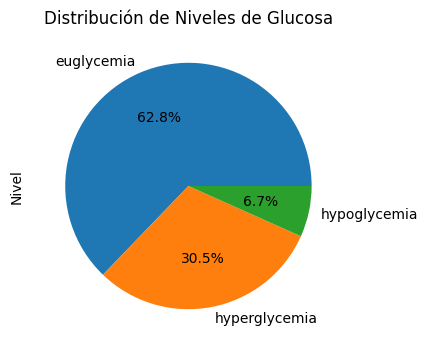

In [29]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [30]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       1323085
hyperglycemia     642978
hypoglycemia      140884
Name: Nivel, dtype: int64

In [31]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

21070


In [32]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 13904
Program finished in 5.4874782000006235 seconds - using multiprocessing
1 27603
Program finished in 5.517724100000123 seconds - using multiprocessing
2 40914
Program finished in 6.663720000000467 seconds - using multiprocessing
3 54807
Program finished in 4.921731899999941 seconds - using multiprocessing
4 67958
Program finished in 6.813939599999685 seconds - using multiprocessing
5 80860
Program finished in 7.039188300000205 seconds - using multiprocessing
6 95693
Program finished in 4.580185099999653 seconds - using multiprocessing
7 111452
Program finished in 5.281635999999708 seconds - using multiprocessing
8 127306
Program finished in 5.35888419999992 seconds - using multiprocessing
9 143845
Program finished in 3.6223227000000406 seconds - using multiprocessing
10 160028
Program finished in 4.889176599999701 seconds - using multiprocessing
11 175849
Program finished in 5.332800899999711 seconds - using multiprocessing
12 190772
Program finished in 5.146514500000194 seconds 

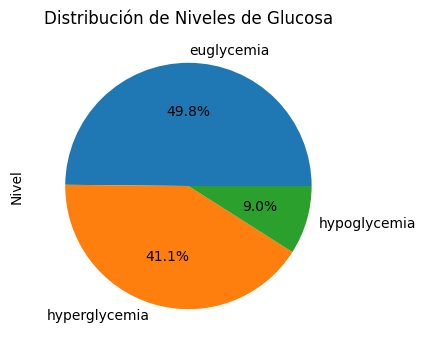

In [33]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [34]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       778964
hyperglycemia    642978
hypoglycemia     140884
Name: Nivel, dtype: int64

In [35]:
with open('dataset/generado/dataset15min/array_Xtrain_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [36]:
with open('dataset/generado/dataset15min/array_Ytrain_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [37]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

15629
0 10897
Program finished in 3.819904100000713 seconds - using multiprocessing
1 21344
Program finished in 3.596340500000224 seconds - using multiprocessing
2 32011
Program finished in 2.1362105999996857 seconds - using multiprocessing
3 42152
Program finished in 3.6687110000002576 seconds - using multiprocessing
4 51841
Program finished in 4.335627100000238 seconds - using multiprocessing
5 63390
Program finished in 3.142552600000272 seconds - using multiprocessing
6 75558
Program finished in 2.7022653999993054 seconds - using multiprocessing
7 88098
Program finished in 1.6547786999999516 seconds - using multiprocessing
8 101140
Program finished in 1.9012235000000146 seconds - using multiprocessing
9 114089
Program finished in 2.6117096000007223 seconds - using multiprocessing
10 126746
Program finished in 2.7306610000005094 seconds - using multiprocessing
11 138626
Program finished in 3.41082280000046 seconds - using multiprocessing
12 150412
Program finished in 3.59796000000005

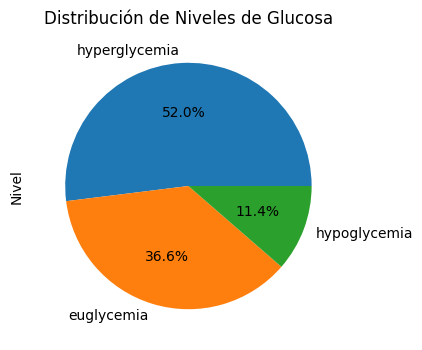

In [38]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [39]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    642978
euglycemia       453446
hypoglycemia     140884
Name: Nivel, dtype: int64

In [40]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

12374
0 11476
Program finished in 0.6355982999994012 seconds - using multiprocessing
1 22655
Program finished in 0.6297022000017023 seconds - using multiprocessing
2 34191
Program finished in 0.49096779999854334 seconds - using multiprocessing
3 46207
Program finished in 0.44803349999892816 seconds - using multiprocessing
4 56702
Program finished in 1.411579299998266 seconds - using multiprocessing
5 67144
Program finished in 1.569805199998882 seconds - using multiprocessing
6 77133
Program finished in 1.9811502000011387 seconds - using multiprocessing
7 86975
Program finished in 2.025772099999813 seconds - using multiprocessing
8 96299
Program finished in 2.315880800000741 seconds - using multiprocessing
9 106143
Program finished in 2.237141999999949 seconds - using multiprocessing
10 116061
Program finished in 2.0362032000011823 seconds - using multiprocessing
11 125901
Program finished in 1.549992199999906 seconds - using multiprocessing
12 135485
Program finished in 1.9830354000005

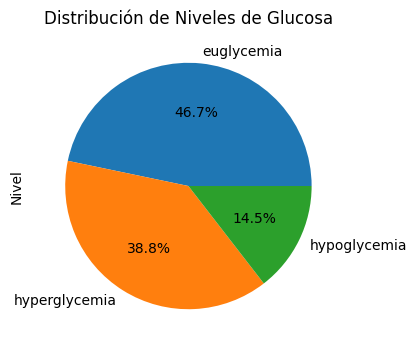

In [41]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [42]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       453446
hyperglycemia    376158
hypoglycemia     140884
Name: Nivel, dtype: int64

In [43]:
with open('dataset/generado/dataset15min/array_Xtrain_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [44]:
with open('dataset/generado/dataset15min/array_Ytrain_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [45]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

9705
0 7010
Program finished in 1.1499991999990016 seconds - using multiprocessing
1 13621
Program finished in 1.1552002000007633 seconds - using multiprocessing
2 20301
Program finished in 1.1231618000001617 seconds - using multiprocessing
3 26694
Program finished in 1.2420309999997698 seconds - using multiprocessing
4 32788
Program finished in 1.3225179000000935 seconds - using multiprocessing
5 40052
Program finished in 1.0294236999998247 seconds - using multiprocessing
6 47824
Program finished in 0.895217600000251 seconds - using multiprocessing
7 55806
Program finished in 0.9270722000001115 seconds - using multiprocessing
8 63999
Program finished in 0.9667343000000983 seconds - using multiprocessing
9 72273
Program finished in 1.141708799999833 seconds - using multiprocessing
10 80286
Program finished in 1.2940225999991526 seconds - using multiprocessing
11 87776
Program finished in 1.4635133000010683 seconds - using multiprocessing
12 95157
Program finished in 1.4605517999989388 

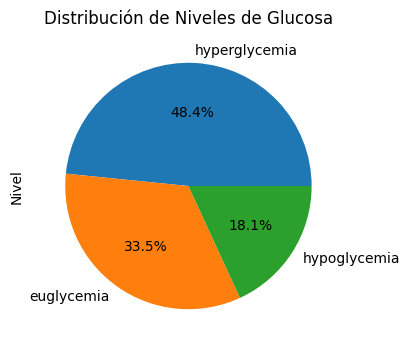

In [46]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [47]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    376158
euglycemia       260108
hypoglycemia     140884
Name: Nivel, dtype: int64

In [48]:
array_Xtrain2=XNew
array_Ytrain2=YNew
array_Ytrain_label2=YnewLabel
N=100
XP=np.array_split(array_Xtrain2, N) 
YP=np.array_split(array_Ytrain2, N)
Y_labelP=np.array_split( array_Ytrain_label2, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

7772
0 7339
Program finished in 0.20693559999926947 seconds - using multiprocessing
1 14349
Program finished in 0.11924679999901855 seconds - using multiprocessing
2 21662
Program finished in 0.1196909999998752 seconds - using multiprocessing
3 29194
Program finished in 0.13196030000108294 seconds - using multiprocessing
4 35892
Program finished in 0.2628439999989496 seconds - using multiprocessing
5 42577
Program finished in 0.3117442000002484 seconds - using multiprocessing
6 48986
Program finished in 0.341115200000786 seconds - using multiprocessing
7 55419
Program finished in 0.3799844999994093 seconds - using multiprocessing
8 61424
Program finished in 0.43845340000007127 seconds - using multiprocessing
9 67810
Program finished in 0.438590200001272 seconds - using multiprocessing
10 73981
Program finished in 0.4736046999987593 seconds - using multiprocessing
11 80338
Program finished in 0.4619414999997389 seconds - using multiprocessing
12 86472
Program finished in 0.5124542000012

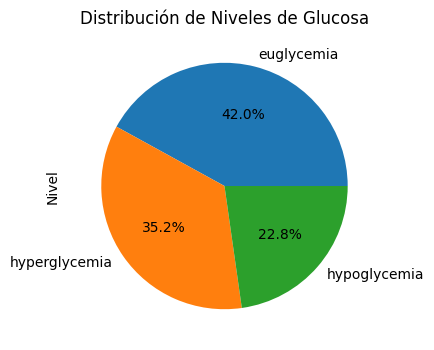

In [49]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [77]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       260108
hyperglycemia    218247
hypoglycemia     140884
Name: Nivel, dtype: int64

In [51]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [52]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'wb') as f:
    np.save(f, YNew)

Cargamos nuevamente para evitar perder todo el trabajo debido a la demora del proceso

In [70]:
with open('dataset/generado/dataset15min/array_Xtrain_down4.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [71]:
with open('dataset/generado/dataset15min/array_Ytrain_down4.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [79]:
len(array_Xtrain)

619239

In [80]:
len(array_Ytrain)

619239

In [73]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

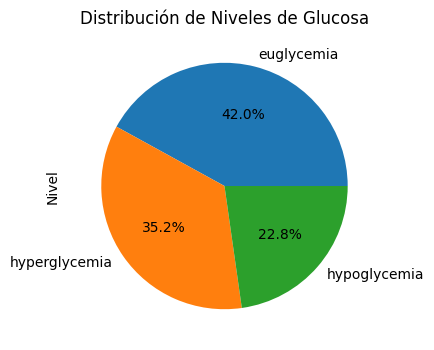

In [74]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [76]:
df_Y_scaled

,Glucose level,Nivel
0,62.0,hypoglycemia
1,93.0,euglycemia
2,103.0,euglycemia
3,85.0,euglycemia
4,67.0,hypoglycemia
...,...,...
619234,255.0,hyperglycemia
619235,244.0,hyperglycemia
619236,241.0,hyperglycemia
619237,220.0,hyperglycemia


In [75]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       260108
hyperglycemia    218247
hypoglycemia     140884
Name: Nivel, dtype: int64

In [81]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.5,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

6193
0 4676
Program finished in 0.40057579999847803 seconds - using multiprocessing
1 9130
Program finished in 0.4459301000024425 seconds - using multiprocessing
2 13546
Program finished in 0.5728491999980179 seconds - using multiprocessing
3 17672
Program finished in 0.6704189000010956 seconds - using multiprocessing
4 21671
Program finished in 0.7577694999999949 seconds - using multiprocessing
5 26619
Program finished in 0.4863058000046294 seconds - using multiprocessing
6 31644
Program finished in 0.5099550999948406 seconds - using multiprocessing
7 36876
Program finished in 0.6229500999979791 seconds - using multiprocessing
8 42257
Program finished in 0.588921599999594 seconds - using multiprocessing
9 47647
Program finished in 0.6477476000000024 seconds - using multiprocessing
10 53038
Program finished in 0.7167054000019561 seconds - using multiprocessing
11 58037
Program finished in 0.7973837999961688 seconds - using multiprocessing
12 62816
Program finished in 0.941500900000392 

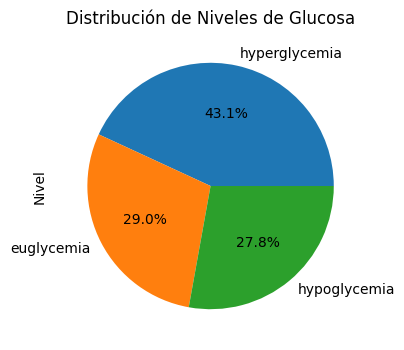

In [82]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [83]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    218247
euglycemia       147020
hypoglycemia     140884
Name: Nivel, dtype: int64

<AxesSubplot: >

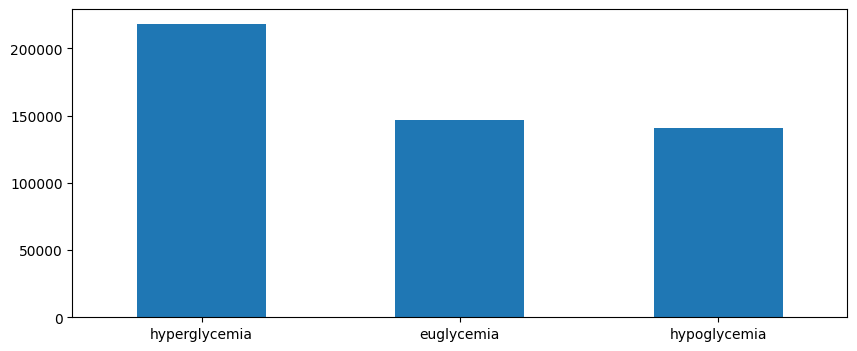

In [84]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [86]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'wb') as f:
    np.save(f, XNew)

In [87]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'wb') as f:
    np.save(f, YNew)

In [110]:
with open('dataset/generado/dataset15min/array_Xtrain_down5.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [111]:
with open('dataset/generado/dataset15min/array_Ytrain_down5.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [112]:
len(array_Xtrain)

506151

In [113]:
len(array_Ytrain)

506151

In [114]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

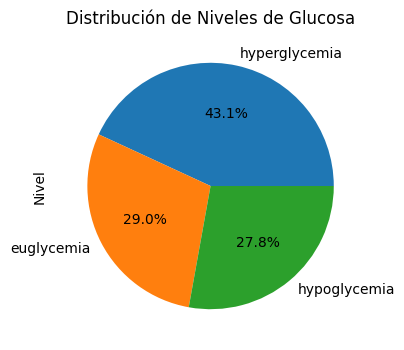

In [115]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [116]:
df_Y_scaled

,Glucose level,Nivel
0,63.000000,hypoglycemia
1,64.000000,hypoglycemia
2,67.000000,hypoglycemia
3,68.000000,hypoglycemia
4,60.000000,hypoglycemia
...,...,...
506146,159.428497,euglycemia
506147,159.701272,euglycemia
506148,159.954562,euglycemia
506149,159.964304,euglycemia


In [117]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    218247
euglycemia       147020
hypoglycemia     140884
Name: Nivel, dtype: int64

In [118]:

N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.3,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

5062
0 4931
Program finished in 0.11788469999737572 seconds - using multiprocessing
1 9717
Program finished in 0.0860474000000977 seconds - using multiprocessing
2 14628
Program finished in 0.10846499999752268 seconds - using multiprocessing
3 19569
Program finished in 0.1341028999959235 seconds - using multiprocessing
4 24251
Program finished in 0.20034949999535456 seconds - using multiprocessing
5 28890
Program finished in 0.26110370000242256 seconds - using multiprocessing
6 33500
Program finished in 0.31641099999978906 seconds - using multiprocessing
7 38104
Program finished in 0.3265488000033656 seconds - using multiprocessing
8 42492
Program finished in 0.3989508000013302 seconds - using multiprocessing
9 47031
Program finished in 0.4100469000040903 seconds - using multiprocessing
10 51474
Program finished in 0.46903200000087963 seconds - using multiprocessing
11 55921
Program finished in 0.46793669999897247 seconds - using multiprocessing
12 60447
Program finished in 0.461987800

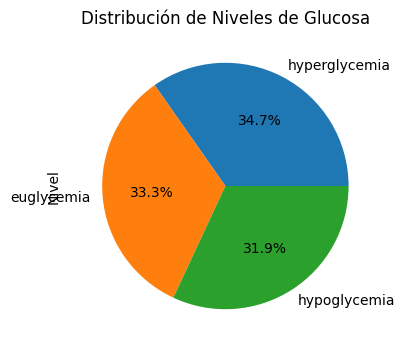

In [119]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [120]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    153201
euglycemia       147020
hypoglycemia     140884
Name: Nivel, dtype: int64

In [122]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'wb') as f:
    np.save(f, XNew)

In [123]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [124]:
with open('dataset/generado/dataset15min/array_Xtrain_down6.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [125]:
with open('dataset/generado/dataset15min/array_Ytrain_down6.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [126]:
len(array_Ytrain)

441105

In [127]:
Yscaled=scalerGlucosa.inverse_transform(array_Ytrain)

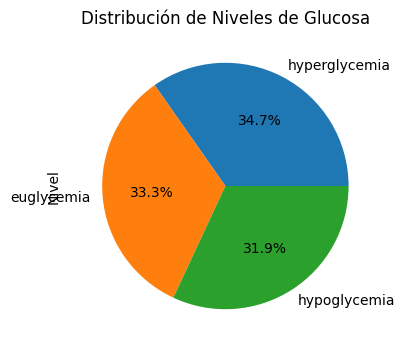

In [128]:
df_Y_scaled = pd.DataFrame(Yscaled, columns=['Glucose level']) 
df_Y_scaled['Nivel'] = df_Y_scaled['Glucose level'].apply(utils.label_LevelBG) 
array_Ytrain_label=df_Y_scaled['Nivel'].to_numpy()
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [129]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    153201
euglycemia       147020
hypoglycemia     140884
Name: Nivel, dtype: int64

In [130]:
minClass=df_Y_scaled['Nivel'].value_counts().min()

In [135]:
minClass

140884

In [136]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xtrain,array_Ytrain,array_Ytrain_label,0,'hyperglycemia',False,minClass) 

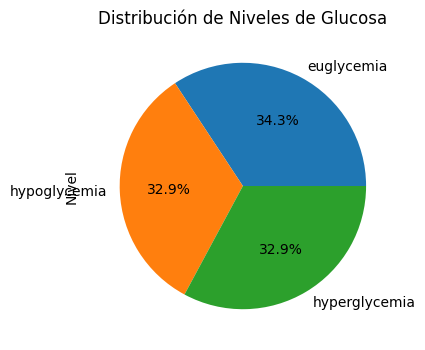

In [137]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [138]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

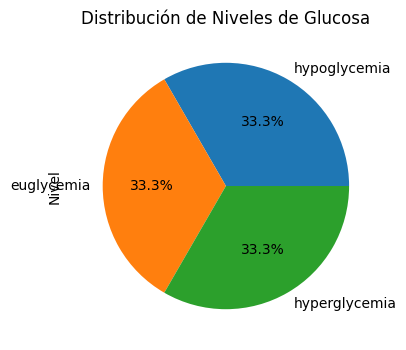

In [139]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [144]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     140884
euglycemia       140884
hyperglycemia    140884
Name: Nivel, dtype: int64

<AxesSubplot: >

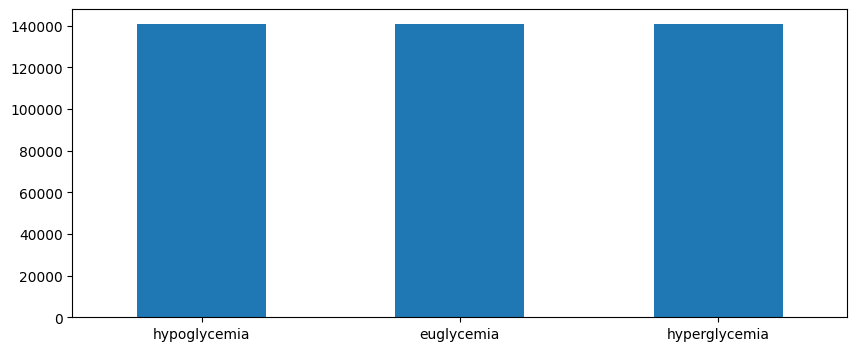

In [145]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [146]:
with open('dataset/generado/dataset15min/array_Xtrain_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [147]:
with open('dataset/generado/dataset15min/array_Ytrain_down_equals.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling on validation dataset

In [234]:
with open('dataset/generado/dataset15min/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [235]:
len(array_Xval)

433087

In [236]:
with open('dataset/generado/dataset15min/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [237]:
len(array_Yval)

433087

In [238]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

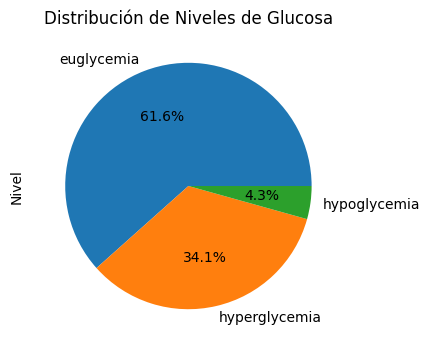

In [239]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [240]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       266780
hyperglycemia    147542
hypoglycemia      18765
Name: Nivel, dtype: int64

<AxesSubplot: >

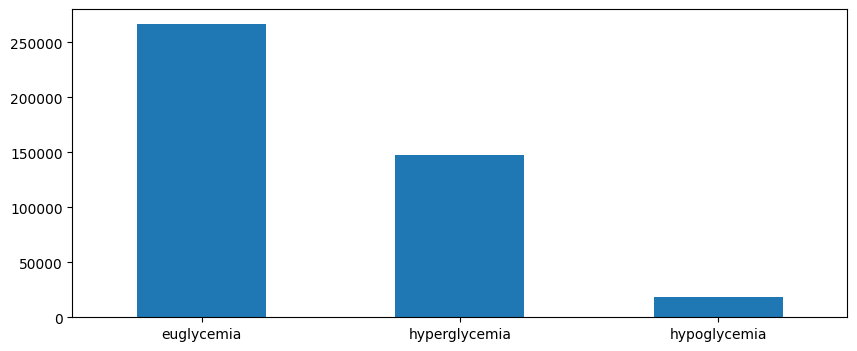

In [241]:
df_Yval_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [242]:
N=100
XP=np.array_split(array_Xval, N) 
YP=np.array_split(array_Yval, N)
Y_labelP=np.array_split( array_YVal_label, N)
print(len(XP[2]))

4331


In [243]:
def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

0 2760
Program finished in 0.42356239999935497 seconds - using multiprocessing
1 5508
Program finished in 0.4574832999933278 seconds - using multiprocessing
2 8234
Program finished in 0.36130279999633785 seconds - using multiprocessing
3 10865
Program finished in 0.2975429000071017 seconds - using multiprocessing
4 13548
Program finished in 0.289346999998088 seconds - using multiprocessing
5 16274
Program finished in 0.2935795999947004 seconds - using multiprocessing
6 19375
Program finished in 0.2375737999973353 seconds - using multiprocessing
7 22733
Program finished in 0.23281200000201352 seconds - using multiprocessing
8 26016
Program finished in 0.296391500000027 seconds - using multiprocessing
9 29043
Program finished in 0.31681279999611434 seconds - using multiprocessing
10 32364
Program finished in 0.3042096999997739 seconds - using multiprocessing
11 35515
Program finished in 0.37465109999175183 seconds - using multiprocessing
12 38660
Program finished in 0.5396691000059946 se

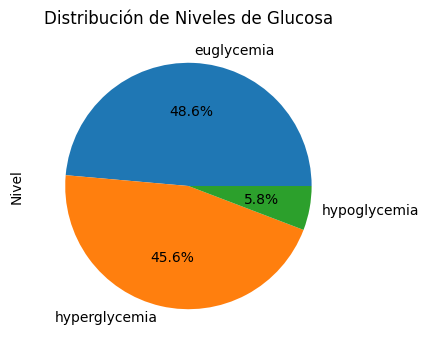

In [244]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [245]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       157267
hyperglycemia    147542
hypoglycemia      18765
Name: Nivel, dtype: int64

In [246]:
with open('dataset/generado/dataset15min/array_Xval_down.npy', 'wb') as f:
    np.save(f, XNew)

In [247]:
with open('dataset/generado/dataset15min/array_Yval_down.npy', 'wb') as f:
    np.save(f, YNew)

In [248]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

3236
0 2144
Program finished in 0.2315283000061754 seconds - using multiprocessing
1 4259
Program finished in 0.2511004999978468 seconds - using multiprocessing
2 6279
Program finished in 0.3070202000089921 seconds - using multiprocessing
3 8302
Program finished in 0.2860676999989664 seconds - using multiprocessing
4 10393
Program finished in 0.28798680000181776 seconds - using multiprocessing
5 12845
Program finished in 0.2643070999911288 seconds - using multiprocessing
6 15549
Program finished in 0.2433926999947289 seconds - using multiprocessing
7 18162
Program finished in 0.2617348000057973 seconds - using multiprocessing
8 20520
Program finished in 0.36045999999623746 seconds - using multiprocessing
9 23174
Program finished in 0.27996269999130163 seconds - using multiprocessing
10 25692
Program finished in 0.30007450000266545 seconds - using multiprocessing
11 28164
Program finished in 0.3719668999983696 seconds - using multiprocessing
12 30617
Program finished in 0.41916750000382

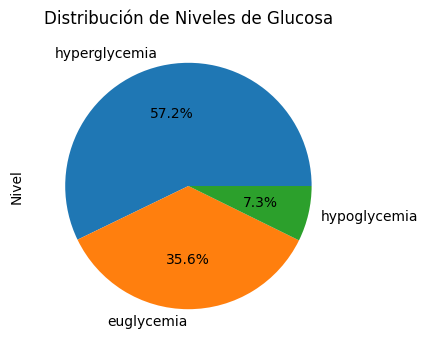

In [249]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [250]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    147542
euglycemia        91750
hypoglycemia      18765
Name: Nivel, dtype: int64

In [251]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

2581
0 2485
Program finished in 0.08213789999717847 seconds - using multiprocessing
1 4957
Program finished in 0.07548559999850113 seconds - using multiprocessing
2 7458
Program finished in 0.0938295000087237 seconds - using multiprocessing
3 9849
Program finished in 0.13001259999873582 seconds - using multiprocessing
4 11920
Program finished in 0.1848115000029793 seconds - using multiprocessing
5 13796
Program finished in 0.26266609999584034 seconds - using multiprocessing
6 15707
Program finished in 0.2327474999910919 seconds - using multiprocessing
7 17786
Program finished in 0.2452078999922378 seconds - using multiprocessing
8 19703
Program finished in 0.21698040000046603 seconds - using multiprocessing
9 21777
Program finished in 0.22690690000308678 seconds - using multiprocessing
10 23733
Program finished in 0.2557819999929052 seconds - using multiprocessing
11 25707
Program finished in 0.3323967000033008 seconds - using multiprocessing
12 27748
Program finished in 0.291885500002

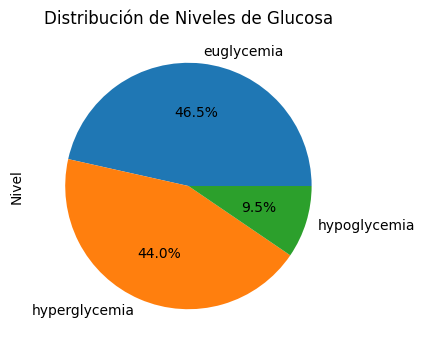

In [252]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [253]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       91750
hyperglycemia    86813
hypoglycemia     18765
Name: Nivel, dtype: int64

In [254]:
with open('dataset/generado/dataset15min/array_Xval_down2.npy', 'wb') as f:
    np.save(f, XNew)

In [255]:
with open('dataset/generado/dataset15min/array_Yval_down2.npy', 'wb') as f:
    np.save(f, YNew)

In [256]:
len(XNew)

197328

<AxesSubplot: >

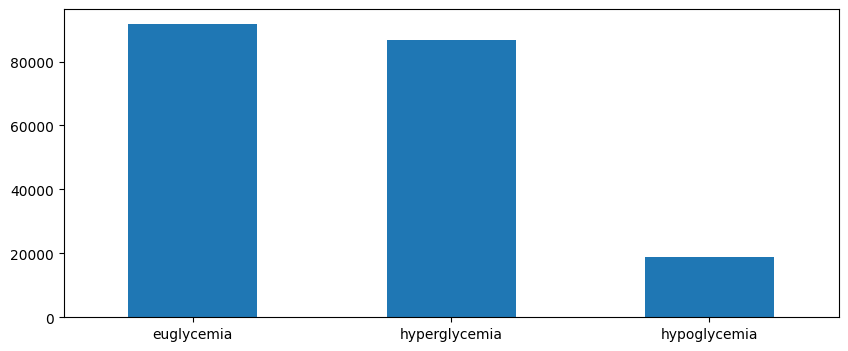

In [257]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [258]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1974
0 1347
Program finished in 0.14767510000092443 seconds - using multiprocessing
1 2661
Program finished in 0.10508710000431165 seconds - using multiprocessing
2 3914
Program finished in 0.12237180001102388 seconds - using multiprocessing
3 5141
Program finished in 0.1134334999951534 seconds - using multiprocessing
4 6412
Program finished in 0.12662850000197068 seconds - using multiprocessing
5 7884
Program finished in 0.12211309999111108 seconds - using multiprocessing
6 9511
Program finished in 0.1274721999943722 seconds - using multiprocessing
7 11096
Program finished in 0.1800288999947952 seconds - using multiprocessing
8 12587
Program finished in 0.21549450000748038 seconds - using multiprocessing
9 14217
Program finished in 0.16042929999821354 seconds - using multiprocessing
10 15773
Program finished in 0.16791220000595786 seconds - using multiprocessing
11 17281
Program finished in 0.24232380000466947 seconds - using multiprocessing
12 18783
Program finished in 0.261815100006

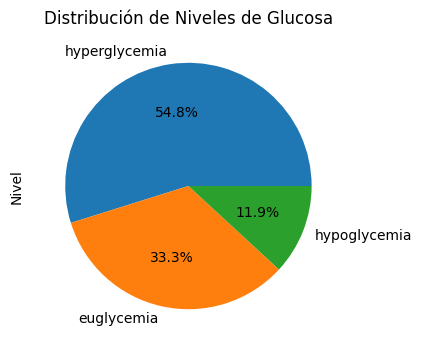

In [259]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [260]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    86813
euglycemia       52729
hypoglycemia     18765
Name: Nivel, dtype: int64

In [261]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1584
0 1543
Program finished in 0.048480400000698864 seconds - using multiprocessing
1 3049
Program finished in 0.035060099995462224 seconds - using multiprocessing
2 4581
Program finished in 0.05685049999738112 seconds - using multiprocessing
3 6056
Program finished in 0.05149430000165012 seconds - using multiprocessing
4 7341
Program finished in 0.08186530000239145 seconds - using multiprocessing
5 8483
Program finished in 0.09144630000810139 seconds - using multiprocessing
6 9660
Program finished in 0.09398080001119524 seconds - using multiprocessing
7 10926
Program finished in 0.08448209999187384 seconds - using multiprocessing
8 12110
Program finished in 0.10388989999773912 seconds - using multiprocessing
9 13409
Program finished in 0.09814390000246931 seconds - using multiprocessing
10 14625
Program finished in 0.11711179999110755 seconds - using multiprocessing
11 15855
Program finished in 0.10998470000049565 seconds - using multiprocessing
12 17119
Program finished in 0.1097831

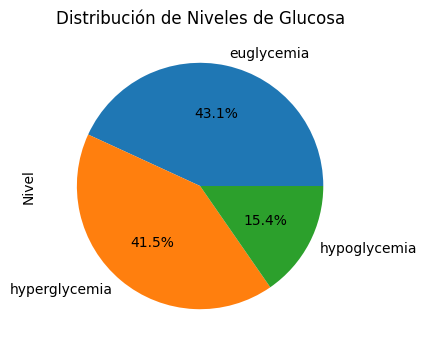

In [262]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [263]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       52729
hyperglycemia    50729
hypoglycemia     18765
Name: Nivel, dtype: int64

In [264]:
with open('dataset/generado/dataset15min/array_Xval_down3.npy', 'wb') as f:
    np.save(f, XNew)

In [265]:
with open('dataset/generado/dataset15min/array_Yval_down3.npy', 'wb') as f:
    np.save(f, YNew)

In [266]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'euglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

1223
0 881
Program finished in 0.06692290000501089 seconds - using multiprocessing
1 1745
Program finished in 0.04869160000816919 seconds - using multiprocessing
2 2538
Program finished in 0.05534120000083931 seconds - using multiprocessing
3 3315
Program finished in 0.06608699999924283 seconds - using multiprocessing
4 4103
Program finished in 0.07110410000314005 seconds - using multiprocessing
5 5031
Program finished in 0.10648139999830164 seconds - using multiprocessing
6 6054
Program finished in 0.08725219999905676 seconds - using multiprocessing
7 7038
Program finished in 0.08459680000669323 seconds - using multiprocessing
8 7965
Program finished in 0.12244390000705607 seconds - using multiprocessing
9 8954
Program finished in 0.11034569999901578 seconds - using multiprocessing
10 9936
Program finished in 0.11548449999827426 seconds - using multiprocessing
11 10866
Program finished in 0.10132960000191815 seconds - using multiprocessing
12 11775
Program finished in 0.11623509999481

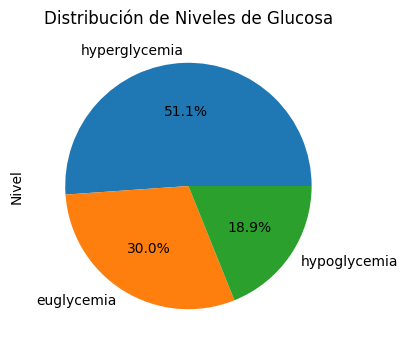

In [267]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [268]:
df_Y_scaled['Nivel'].value_counts()

hyperglycemia    50729
euglycemia       29755
hypoglycemia     18765
Name: Nivel, dtype: int64

In [269]:
array_Xtrain=XNew
array_Ytrain=YNew
array_Ytrain_label=YnewLabel
N=100
XP=np.array_split(array_Xtrain, N) 
YP=np.array_split(array_Ytrain, N)
Y_labelP=np.array_split( array_Ytrain_label, N)
print(len(XP[2]))

def downsamplingByLabel_args(item):
    return utils.downsamplingByLabel(item[0],item[1],item[2],0.50,'hyperglycemia',False)

XNew=np.reshape([], (0,array_Xtrain.shape[1],array_Xtrain.shape[2]))
YNew=np.reshape([], (0,1))
YnewLabel=np.reshape([], (0))
for ni in range(0,N):   
    start_time = time.perf_counter()
    partes=10
    X_split=np.array_split(XP[ni], partes)
    Y_split=np.array_split(YP[ni], partes)
    Y_label_split=np.array_split( Y_labelP[ni], partes)

    items=[]
    for i in range(len(X_split)):
        items.append([X_split[i],Y_split[i],Y_label_split[i]])
    if __name__ ==  '__main__': 
        pool = Pool()
        for result in pool.imap_unordered(downsamplingByLabel_args, items):
            XNew=np.concatenate((XNew, result[0]))
            YNew=np.concatenate((YNew, result[1]))
            YnewLabel=np.concatenate((YnewLabel, result[2]))

    finish_time = time.perf_counter()
    print(ni,len(YnewLabel))
    print("Program finished in {} seconds - using multiprocessing".format(finish_time-start_time))

993
0 975
Program finished in 0.04470420000143349 seconds - using multiprocessing
1 1947
Program finished in 0.02881350000097882 seconds - using multiprocessing
2 2894
Program finished in 0.03920739999739453 seconds - using multiprocessing
3 3837
Program finished in 0.04273289999400731 seconds - using multiprocessing
4 4644
Program finished in 0.07787730000563897 seconds - using multiprocessing
5 5388
Program finished in 0.10178739999537356 seconds - using multiprocessing
6 6144
Program finished in 0.10292520000075456 seconds - using multiprocessing
7 6947
Program finished in 0.09034179999434855 seconds - using multiprocessing
8 7702
Program finished in 0.09696689998963848 seconds - using multiprocessing
9 8520
Program finished in 0.08873239999229554 seconds - using multiprocessing
10 9260
Program finished in 0.11414579999109264 seconds - using multiprocessing
11 10017
Program finished in 0.1218181000003824 seconds - using multiprocessing
12 10846
Program finished in 0.1251565999991726

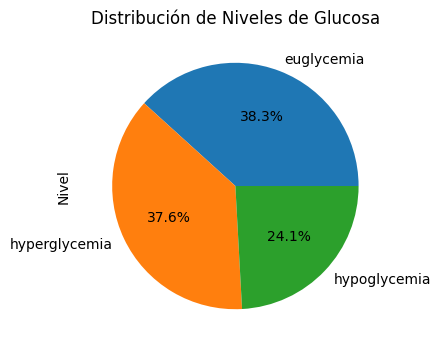

In [270]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [271]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29755
hyperglycemia    29226
hypoglycemia     18765
Name: Nivel, dtype: int64

In [272]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'wb') as f:
    np.save(f, XNew)

In [273]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'wb') as f:
    np.save(f, YNew)

# Downsampling reduciendo hasta el total de la clase minoritaria

In [274]:
with open('dataset/generado/dataset15min/array_Xval_down4.npy', 'rb') as f:
    array_Xval = np.load(f)

In [275]:
len(array_Xval)

77746

In [276]:
with open('dataset/generado/dataset15min/array_Yval_down4.npy', 'rb') as f:
    array_Yval = np.load(f)

In [277]:
len(array_Yval)

77746

In [278]:
array_Yval_scaled=scalerGlucosa.inverse_transform(array_Yval)

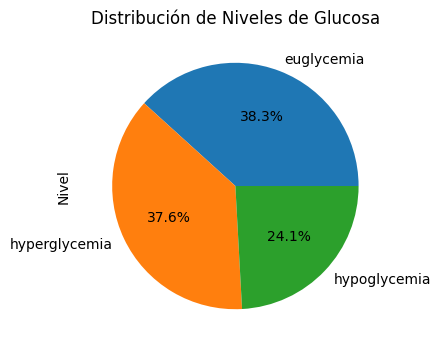

In [279]:
df_Yval_scaled = pd.DataFrame(array_Yval_scaled, columns=['Glucose level']) 
df_Yval_scaled['Nivel'] = df_Yval_scaled['Glucose level'].apply(utils.label_LevelBG)  
array_YVal_label=df_Yval_scaled['Nivel'].to_numpy()
df_Yval_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [280]:
df_Yval_scaled['Nivel'].value_counts()

euglycemia       29755
hyperglycemia    29226
hypoglycemia     18765
Name: Nivel, dtype: int64

In [281]:
minClass=df_Y_scaled['Nivel'].value_counts().min()
minClass

18765

In [282]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(array_Xval,array_Yval,array_YVal_label,0,'hyperglycemia',False,minClass) 

In [283]:
len(YnewLabel)

67285

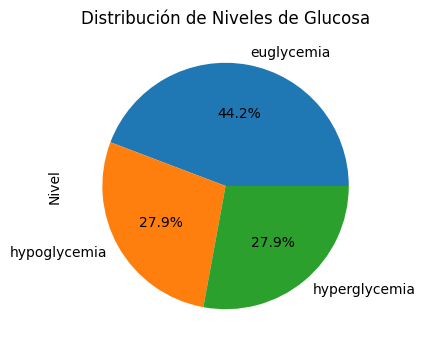

In [284]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [285]:
df_Y_scaled['Nivel'].value_counts()

euglycemia       29755
hypoglycemia     18765
hyperglycemia    18765
Name: Nivel, dtype: int64

In [286]:
XNew,YNew,YnewLabel=utils.downsamplingByLabel(XNew,YNew,YnewLabel,0,'euglycemia',False,minClass) 

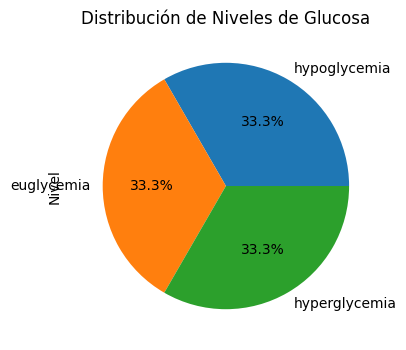

In [287]:
df_Y_scaled = pd.DataFrame(YnewLabel, columns=['Nivel']) 
df_Y_scaled['Nivel'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='Nivel',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

In [288]:
df_Y_scaled['Nivel'].value_counts()

hypoglycemia     18765
euglycemia       18765
hyperglycemia    18765
Name: Nivel, dtype: int64

<AxesSubplot: >

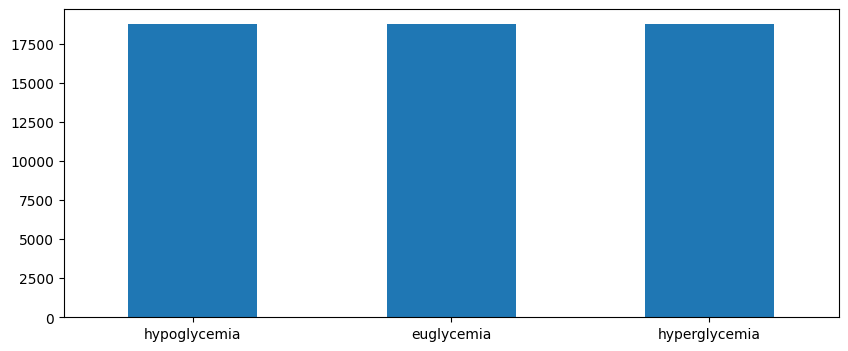

In [289]:
df_Y_scaled['Nivel'].value_counts().plot.bar( rot=0,figsize=(10, 4))

In [290]:
with open('dataset/generado/dataset15min/array_Xval_down_equals.npy', 'wb') as f:
    np.save(f, XNew)

In [291]:
with open('dataset/generado/dataset15min/array_Yval_down_equals.npy', 'wb') as f:
    np.save(f, YNew)